<a href="https://colab.research.google.com/github/OmSwami04/FACIAL-EMOTION-DETECTION-SYSTEM-THROUGH-MACHINE-LEARNING-APPROACH/blob/main/minifinaldone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0


--2024-04-04 10:17:04--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2024-04-04 10:17:05--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73c15acf136d261c4e2d87eb65.dl.dropboxusercontent.com/cd/0/inline/CQah7-KBwl9vS1rK1IQ5KREmcBhz-GdSCNQJ2POoXoUaK6gPGea_9QBTdfrXbBt93ePMCvPBVKJ9xmqTJrAjq2AitBj1oxEj_p3auaaye4PIP4xsugdf46nYXw34AhT9PNPTDSelHW3nOJK7dInB93Py/file# [following]
--2024-04-04 10:17:05--  https://uc73c15acf136d261c4e2d87eb65.dl.dropboxusercontent.com/cd/0/inline/CQah7-KBwl9vS1rK1IQ5KREmcBhz-GdSCNQJ2POoXoUaK6gPGea_9QBTdfrXbBt93ePMCvPBVKJ9xmqTJrAjq2AitBj1oxEj_p3a

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [ ]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


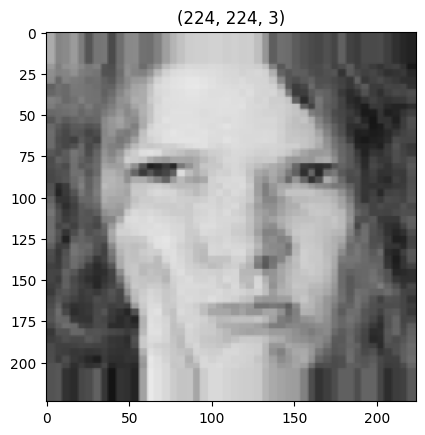

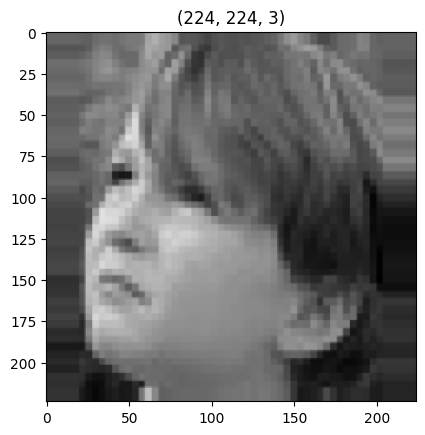

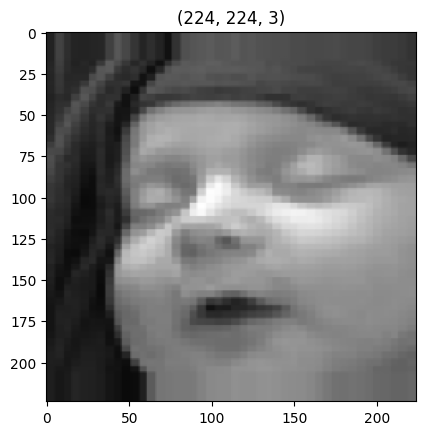

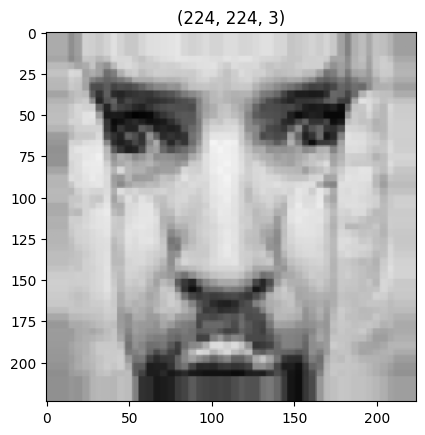

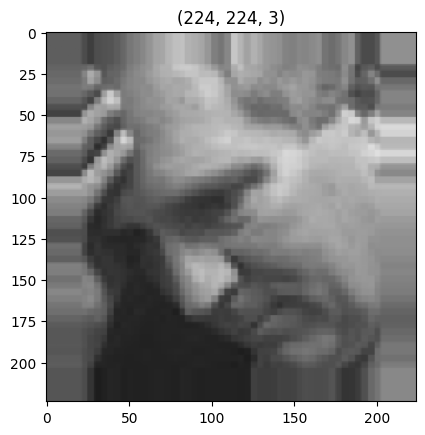

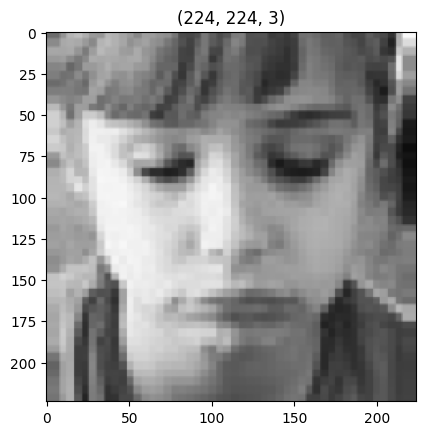

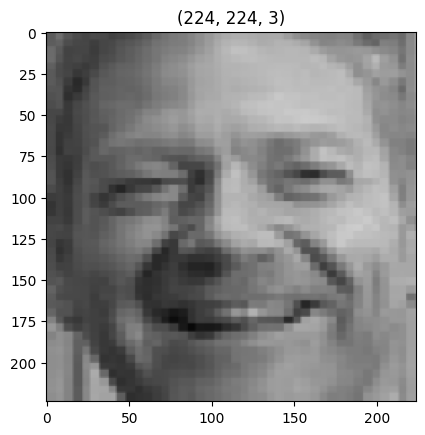

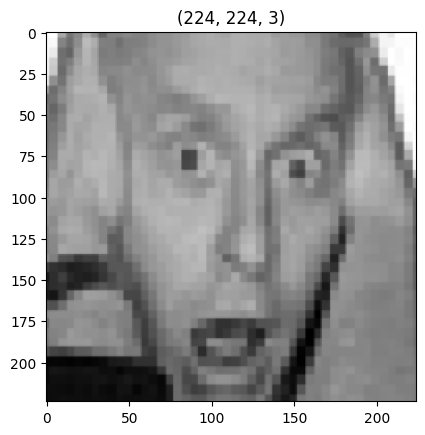

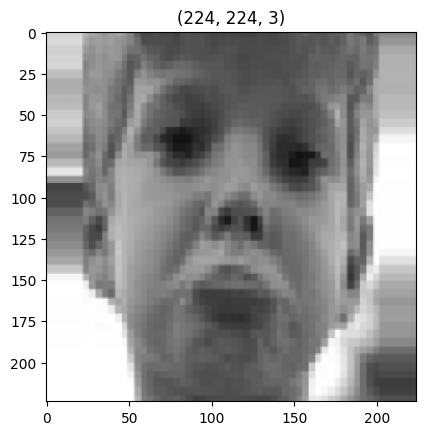

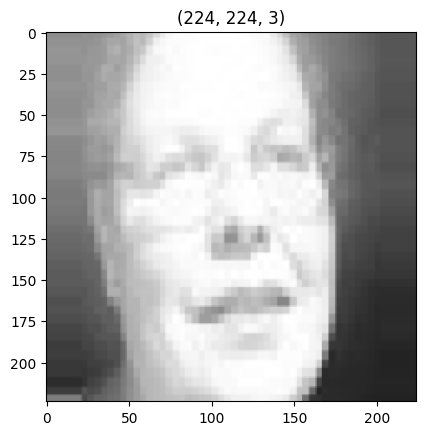

In [ ]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 50,
                           epochs= 20,
                           validation_data= val_data,
                           validation_steps= 10,
                           callbacks=[es,mc])

<ipython-input-17-1928661dcc11>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 6.6131 - accuracy: 0.5056
Epoch 1: val_accuracy did not improve from 0.50937
50/50 [==============================] - 103s 2s/step - loss: 6.6131 - accuracy: 0.5056 - val_loss: 8.6453 - val_accuracy: 0.4313
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 7.5197 - accuracy: 0.4850
Epoch 2: val_accuracy did not improve from 0.50937
50/50 [==============================] - 100s 2s/step - loss: 7.5197 - accuracy: 0.4850 - val_loss: 9.9112 - val_accuracy: 0.4156
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 7.6114 - accuracy: 0.4963
Epoch 3: val_accuracy did not improve from 0.50937
50/50 [==============================] - 95s 2s/step - loss: 7.6114 - accuracy: 0.4963 - val_loss: 7.5717 - val_accuracy: 0.4906
Epoch 4/20
50/50 [==============================] - ETA: 0s - loss: 7.0144 - accuracy: 0.5106
Epoch 4: val_accuracy did not improve from 0.50937
50/50 [========================